# Portfolio Project - LendingClub Dataset

# The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

## Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

## Data Overview

In [3]:
df_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [4]:
print(df_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    return print(df_info.loc[col_name]['Description'])

In [6]:
feat_info('application_type')

Indicates whether the loan is an individual application or a joint application with two co-borrowers


### Loading Dataset

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


#### Observation
We can see that emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies are missing data

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

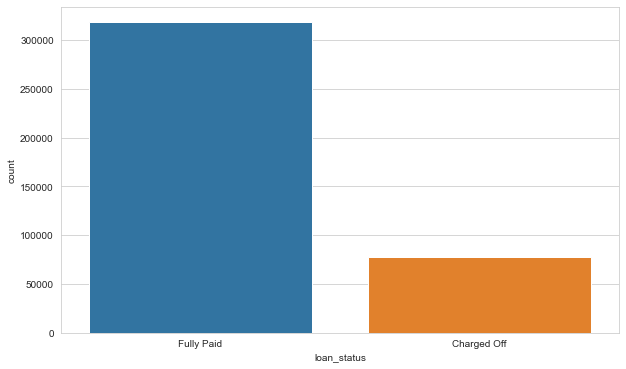

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status', data=df)

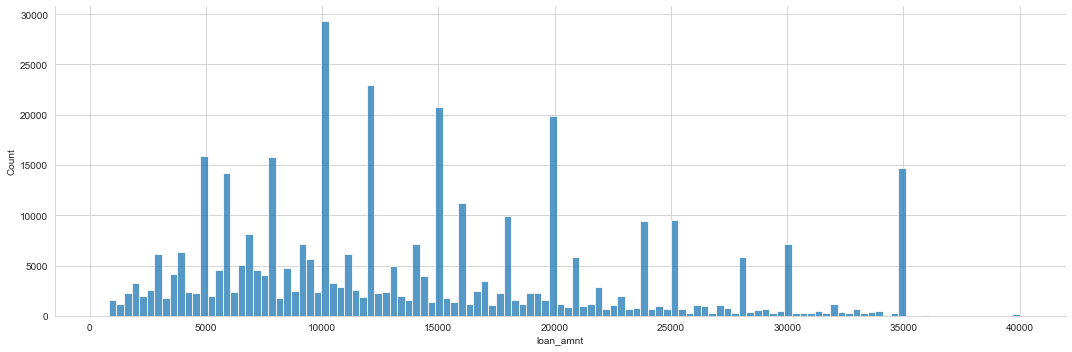

In [12]:
sns.displot(x='loan_amnt', data=df, aspect=3)

### Correlation

In [13]:
df_corr = df.corr()

<AxesSubplot:>

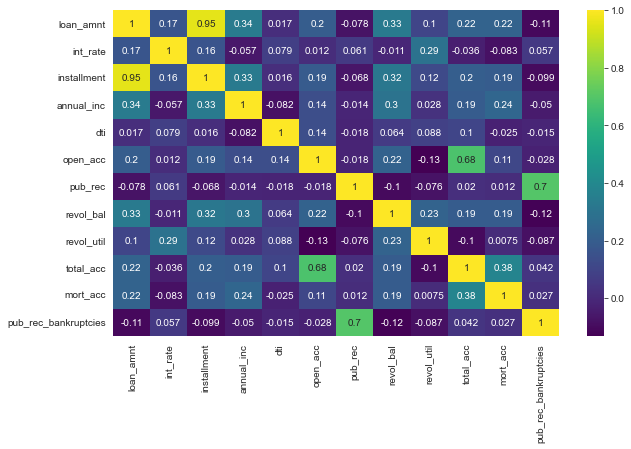

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr ,cmap='viridis', annot=True)

#### The correlation between installment and loan_amnt is very high

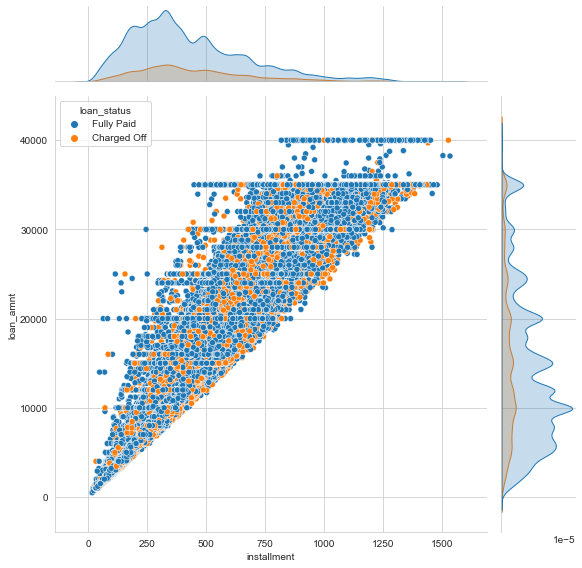

In [15]:
sns.jointplot(x='installment', y='loan_amnt', data=df, hue='loan_status', height=8)

In [16]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [17]:
feat_info("loan_amnt")

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


### Realtionship between loan status and loan amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

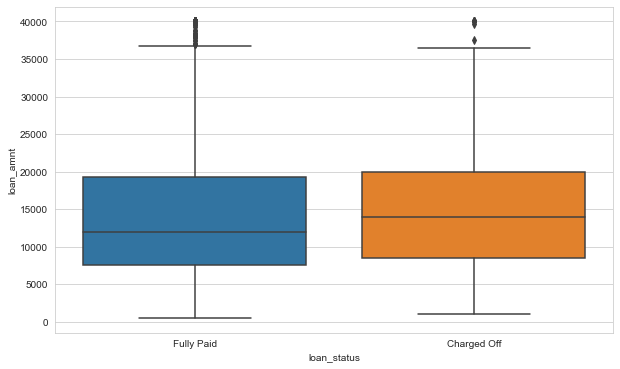

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Exploring Grade and Subgrade Columns

In [20]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [21]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

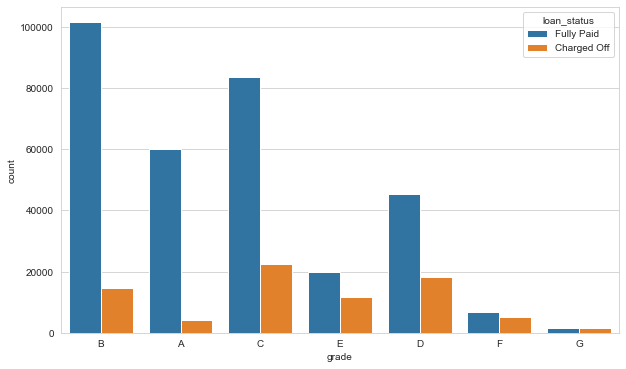

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', data=df, hue='loan_status')

In [23]:
sorted_sub_grades = sorted(df['sub_grade'].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

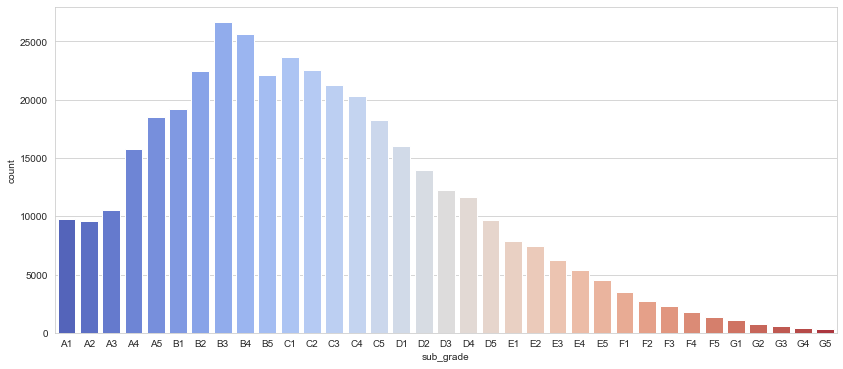

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', data=df, order=sorted_sub_grades, palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

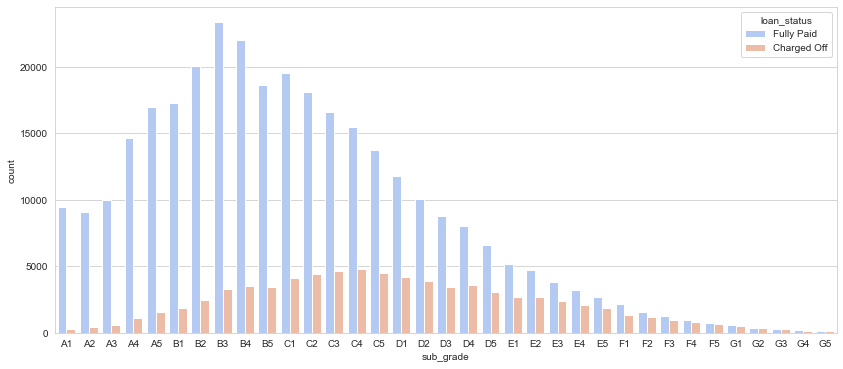

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sorted_sub_grades, palette='coolwarm')

#### It looks like F and G subgrades don't get paid back that often. Countplot for only those grades

In [26]:
df_fg = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sorted_fg_sub_grades = sorted(df_fg['sub_grade'].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

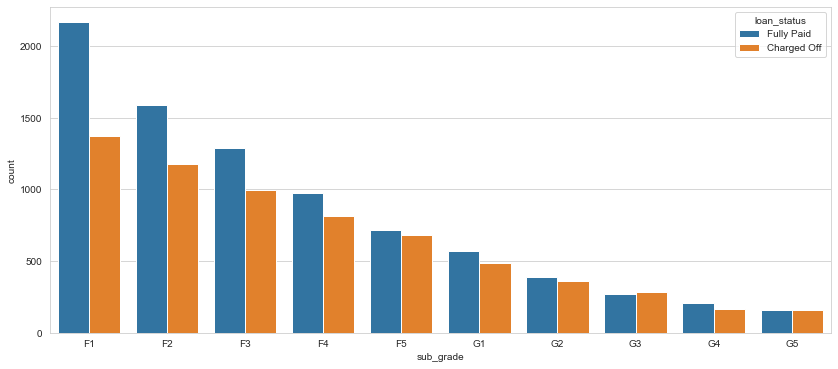

In [27]:
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', data=df_fg, hue='loan_status', order=sorted_fg_sub_grades)

In [28]:
def repaied(status):
    if status == 'Fully Paid':
        return 1
    else: return 0

df['loan_repaid'] = df['loan_status'].apply(repaied)

In [29]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

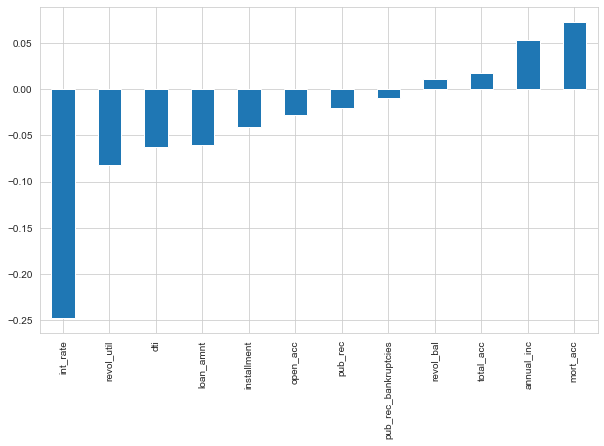

In [30]:
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Processing

Earlier we saw that emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies are missing values

## Missing Values

In [31]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [32]:
len(df)

396030

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
df.isnull().sum().apply(lambda x: x / 396030 * 100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [35]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [36]:
df['emp_title'].nunique()

173105

In [37]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

#### There are too many unique job titles to create dummy variables, so we will just remove them from the feature

In [38]:
df = df.drop('emp_title', axis=1)

In [39]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [40]:
emp_sorted = ['< 1 year',
              '1 year',
              '2 years',
              '3 years',
              '4 years',
              '5 years',
              '6 years',
              '7 years',
              '8 years',
              '9 years',
              '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

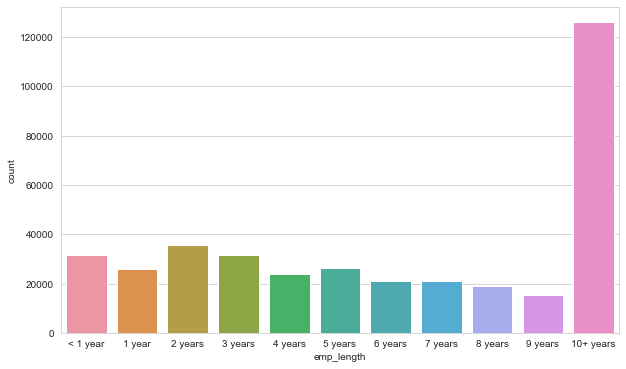

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, order=emp_sorted)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

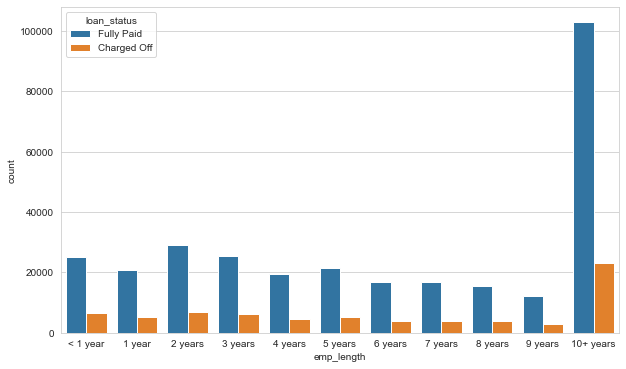

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length', data=df, order=emp_sorted, hue='loan_status')

In [43]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [44]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [45]:
emp_len = emp_co/emp_fp

In [46]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

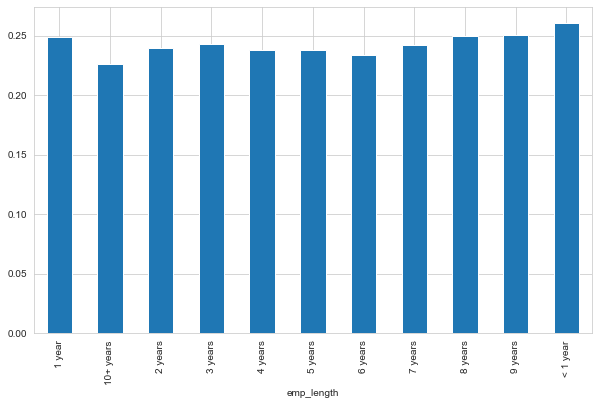

In [47]:
emp_len.plot(kind='bar', figsize=(10,6))

#### We can see that charge off rates are extremely similar across all employment lengths, we can drop the emp_length feature

In [48]:
df = df.drop('emp_length', axis=1)

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [50]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [51]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

#### The title feature is just a string description for the purpose feature, we can drop the title feature

In [52]:
df = df.drop('title', axis=1)

In [53]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Finding out what the  mort_acc represent and how to fill nan values

In [54]:
feat_info('mort_acc')

Number of mortgage accounts.


In [55]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [56]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [57]:
total_acc_mean = df.groupby('total_acc').mean()['mort_acc']

In [60]:
total_acc_mean[34.0]

2.589579158316633

In [61]:
def get_mean(total, mort):
    num = total_acc_mean[total]
    if pd.isna(mort):
        return num
    else: return mort

In [62]:
df['mort_acc'] = df.apply(lambda x: get_mean(x.total_acc ,x.mort_acc), axis=1)

In [66]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

#### revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Drop these rows

In [73]:
df = df.dropna()

In [75]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [189]:
df.select_dtypes(include=['object']).columns

Index(['loan_status'], dtype='object')

### Term Feature
#### Covert term to 36 or 60 integer

In [93]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [107]:
df['term'] = df['term'].apply(lambda x: int(x.split(' ')[1]))

### Grade and Sub Grade Feature

#### We already know that grade is part of sub_grade so we can drop  the grade feature

In [113]:
df = df.drop('grade', axis=1)

In [117]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [119]:
df = pd.concat([df, sub_grade_dummies], axis=1)

In [121]:
df = df.drop('sub_grade', axis=1)

### Create Dummy variables for verification_status, application_type, initial_list_status and purpose

In [136]:
verif_dummies = pd.get_dummies(df['verification_status'], drop_first=True)
app_dummies = pd.get_dummies(df['application_type'], drop_first=True)
init_dummies = pd.get_dummies(df['initial_list_status'], drop_first=True)
purp_dummies = pd.get_dummies(df['purpose'], drop_first=True)

In [137]:
df = df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1)

In [138]:
df = pd.concat([df, verif_dummies, app_dummies, init_dummies, purp_dummies], axis=1)

In [154]:
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

### Home Ownership Feature

In [142]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [149]:
df['home_ownership'] = df['home_ownership'].replace(to_replace=('NONE', 'ANY'), value='OTHER')

In [150]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [151]:
home_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [152]:
df = df.drop('home_ownership', axis=1)

In [153]:
df = pd.concat([df, home_dummies], axis=1)

### Address Feature

In [162]:
df['address'] = df['address'].apply(lambda x: x[-5:])

In [163]:
df['address'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: address, dtype: int64

In [164]:
address_dummies = pd.get_dummies(df['address'], drop_first=True)

In [165]:
df = df.drop('address', axis=1)

In [166]:
df = pd.concat([df, address_dummies] ,axis=1)

### Issue_d Feature
**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [171]:
df = df.drop('issue_d', axis=1)

### Earliest_cr_line Feature

In [185]:
df['earliest_cr_yr'] = df['earliest_cr_line'].apply(lambda x: pd.to_datetime(x).year)

In [188]:
df = df.drop('earliest_cr_line', axis=1)

### Loan Status feature drop

In [190]:
df = df.drop('loan_status', axis=1)

# Building the Model
## Train Test Split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700', 'earliest_cr_yr'],
      dtype='object')

In [193]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data
### MinMaxScaler

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [197]:
X_train = scaler.fit_transform(X_train)

In [198]:
X_test = scaler.transform(X_test)

## Creating the Model

In [199]:
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [202]:
X_train.shape

(316175, 78)

In [204]:
model = Sequential()

#input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1, activation='sigmoid'))

#compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [205]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test))

2022-06-26 16:32:45.582691: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-26 16:32:45.584929: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-26 16:32:45.764469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
1236/1236 [==============================] - ETA: 0s - loss: 0.2976

2022-06-26 16:33:01.913873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1236/1236 [==============================] - 18s 14ms/step - loss: 0.2976 - val_loss: 0.2644
Epoch 2/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2644 - val_loss: 0.2627
Epoch 3/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2623 - val_loss: 0.2628
Epoch 4/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2613 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2603 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2600 - val_loss: 0.2619
Epoch 7/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2594 - val_loss: 0.2613
Epoch 8/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2588 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 17s 14ms/step - loss: 0.2587 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 17s 14ms/step - lo

## Save Model

In [206]:
from tensorflow.keras.models import load_model

In [207]:
model.save('full_data_project_model.h5')

# Evaluating Model Performance

In [209]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

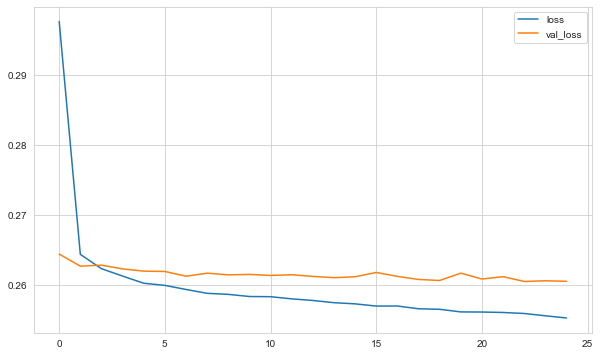

In [211]:
losses.plot(figsize=(10,6))

### Create Predictions and show classification report and confusion matrix

In [218]:
predictions = model.predict_classes(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [219]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix

In [221]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



[[ 7159  8499]
 [  353 63033]]


## Random Entry

In [222]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt         25000.00
term                 60.00
int_rate             18.24
installment         638.11
annual_inc        61665.00
                    ...   
48052                 0.00
70466                 0.00
86630                 0.00
93700                 0.00
earliest_cr_yr     1996.00
Name: 305323, Length: 78, dtype: float64

In [223]:
model.predict_classes(new_customer.values.reshape(1,78))

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [224]:
df.iloc[random_ind]['loan_repaid']

1.0